In [74]:
# Objetivo: Importar Librerias Necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style()
sns.set_theme()

## Cargo la data de las temperaturas por ciudad y inspecciono por arriba

In [75]:
# Objetivo: Levantar los datos desde el csv y mostrar las primeras filas

landTempetureCity = pd.read_csv('../GlobalTemperatures.csv').rename(columns={'LandAverageTemperature':'Temperatura Promedio'})
landTempetureCity.head()

,dt,Temperatura Promedio,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Objetivo: Ver las dimensiones de nuestro dataset

landTempetureCity.shape

(3192, 9)

In [77]:
# Objetivo: Ver la cantidad de datos no nulos de nuestro dataset

landTempetureCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   Temperatura Promedio                       3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [78]:
# Objetivo: Ver la cantidad de datos nulos de nuestro dataset

landTempetureCity.isnull().sum()

dt                                              0
Temperatura Promedio                           12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [79]:
# Objetivo: Ver los tipos de datos de los datos que tenemos en las columnas

landTempetureCity.dtypes

dt                                            object
Temperatura Promedio                         float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [80]:
# Objetivo: Obtener los estadisticos descriptivos de las columnas numericas

landTempetureCity.describe()

,Temperatura Promedio,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [81]:
# Objetivo: Convertir la columna dt a un tipo de dato mas ameno para trabajar con fechas

landTempetureCity['Tiempo'] = pd.to_datetime(landTempetureCity['dt']) 

In [82]:
landTempetureCity['Tiempo'][0]

Timestamp('1750-01-01 00:00:00')

In [83]:
landTempetureCity['Tiempo'].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: Tiempo, dtype: int64

In [84]:
# Objetivo: Tomo una muestra con las mediciones a partir del año 1940

tempLand = landTempetureCity[landTempetureCity['Tiempo'].dt.year >= 1940]

Text(0.5, 1.0, 'Cambio de la temperatura terrestre a lo largo del tiempo')

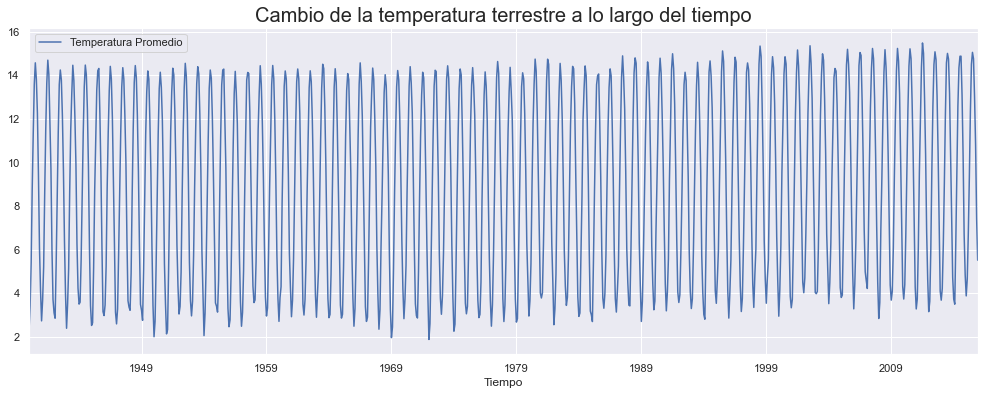

In [85]:
# Objetivo: Un primer grafico de los datos tal cual estan

tempLand[['Tiempo', 'Temperatura Promedio']].plot(x='Tiempo', y='Temperatura Promedio', figsize=(17,6)).set_title('Cambio de la temperatura terrestre a lo largo del tiempo', size=20)

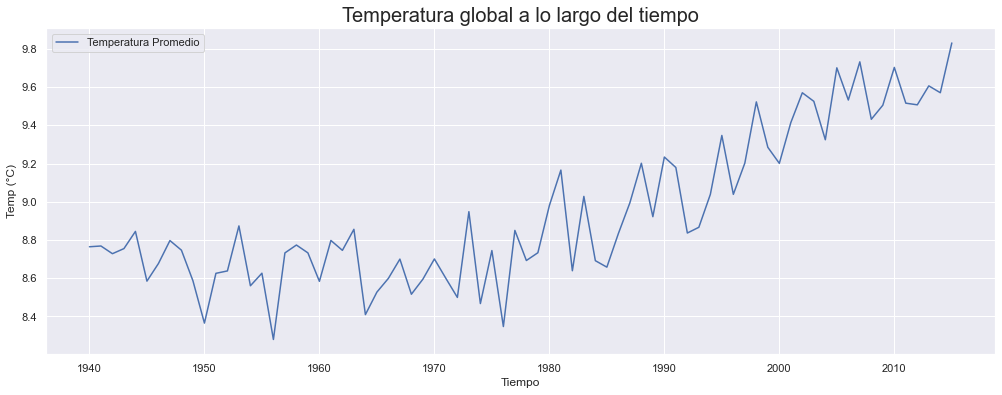

In [86]:
# Objetivo: Bajamos la granularidad de los datos agrupando por año

fig = tempLand[['Tiempo', 'Temperatura Promedio']].groupby(tempLand['Tiempo'].dt.year).mean().plot(y='Temperatura Promedio', figsize=(17,6))
fig.set_title('Temperatura global a lo largo del tiempo', size=20)
fig.set_ylabel('Temp (°C)')
plt.savefig('int-tempglobal.jpg', transparent=False)

Text(0, 0.5, 'Temp (°C)')

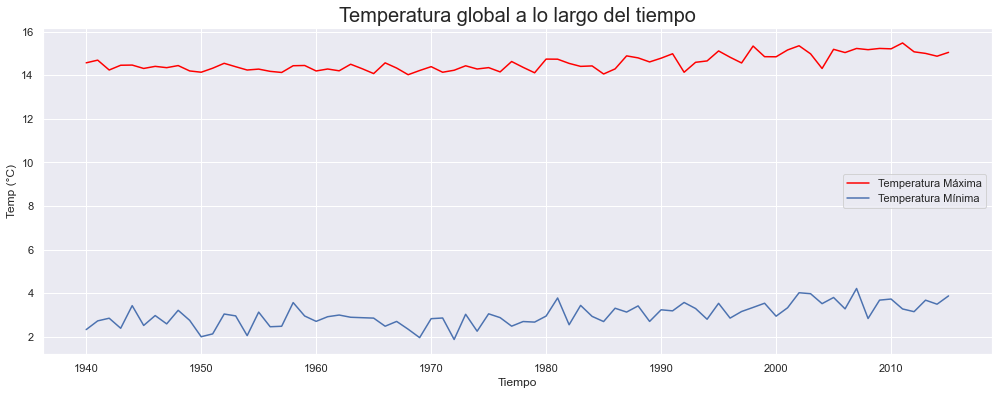

In [87]:
minimas = tempLand[['Tiempo', 'Temperatura Promedio']].rename(columns={'Temperatura Promedio':'Temperatura Mínima'}).groupby(tempLand['Tiempo'].dt.year).min()
maximas = tempLand[['Tiempo', 'Temperatura Promedio']].rename(columns={'Temperatura Promedio':'Temperatura Máxima'}).groupby(tempLand['Tiempo'].dt.year).max()

fig = maximas.plot(y='Temperatura Máxima', figsize=(17,6), color='red')
minimas.plot(y='Temperatura Mínima', figsize=(17,6), ax=fig)
fig.set_title('Temperatura global a lo largo del tiempo', size=20)
fig.set_ylabel('Temp (°C)')

Tiempo
1940    12.236
1941    11.959
1942    11.385
1943    12.064
1944    11.034
dtype: float64


Text(0, 0.5, 'Temp (°C)')

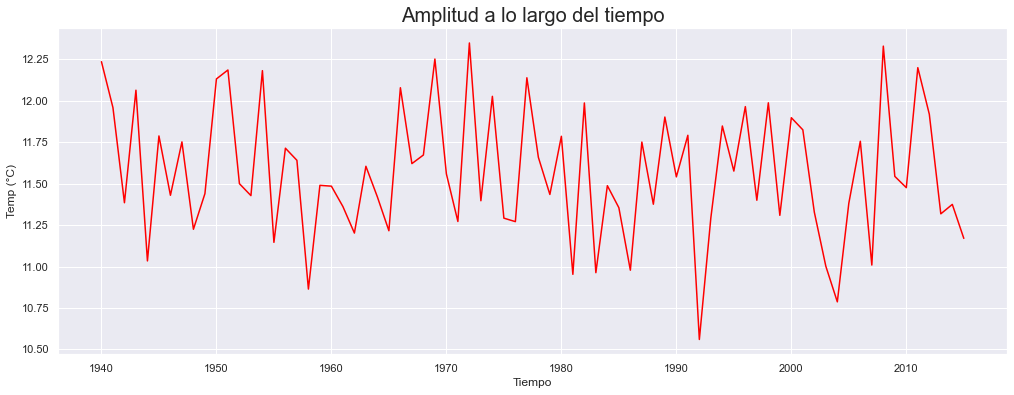

In [88]:
amplitud = maximas['Temperatura Máxima'] - minimas['Temperatura Mínima']
print(amplitud.head())

fig = amplitud.plot(figsize=(17,6), color='red')
fig.set_title('Amplitud a lo largo del tiempo', size=20)
fig.set_ylabel('Temp (°C)')

In [89]:
tempLandYear = tempLand.groupby(tempLand['Tiempo'].dt.year).mean()

## Cargo la data de Deshielo y inspecciono por arriba

In [90]:
# Objetivo: Levantar los datos desde el csv y mostrar las primeras filas

DeshieloData = pd.read_csv('../seaice.csv')
DeshieloData  = DeshieloData[DeshieloData['Year'] < 2019][DeshieloData['Year'] > 1978]
print(DeshieloData.head())

    Year   Month   Day       Extent      Missing  \
34  1979       1     2       14.997          0.0   
35  1979       1     4       14.922          0.0   
36  1979       1     6       14.929          0.0   
37  1979       1     8       14.968          0.0   
38  1979       1    10       15.190          0.0   

                                          Source Data hemisphere  
34   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
35   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
36   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
37   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  
38   ['ftp://sidads.colorado.edu/pub/DATASETS/nsid...      north  


/tmp/ipykernel_523416/2498841851.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DeshieloData  = DeshieloData[DeshieloData['Year'] < 2019][DeshieloData['Year'] > 1978]


In [91]:
# Objetivo: Mostrar los tipos de datos inferidos por pandas a la hora de levantar los datos

# DeshieloData.dtypes
print(DeshieloData.describe())

               Year         Month           Day        Extent       Missing
count  25984.000000  25984.000000  25984.000000  25984.000000  25984.000000
mean    2000.437115      6.535252     15.739763     11.517275      0.000003
std       10.730020      3.443261      8.800811      4.607533      0.000229
min     1979.000000      1.000000      1.000000      2.080000      0.000000
25%     1992.000000      4.000000      8.000000      7.627750      0.000000
50%     2001.000000      7.000000     16.000000     12.221500      0.000000
75%     2010.000000     10.000000     23.000000     15.146000      0.000000
max     2018.000000     12.000000     31.000000     20.201000      0.024000


In [92]:
DeshieloData.columns = ['year', 'month', 'day', 'Superficie', 'missing', 'sourceData', 'hemisphere']

In [93]:
# Objetivo: Mostrar las dimensiones de nuestro set de datos

DeshieloData.shape

(25984, 7)

In [94]:
# Objetivo: Ver si tenemos datos faltantes en alguna columna

DeshieloData.isnull().sum()

year          0
month         0
day           0
Superficie    0
missing       0
sourceData    0
hemisphere    0
dtype: int64

In [95]:
# Objetivo: Preparar una columna para que sea una combinacion unica de valores para realizar luego el agregado de la informacion de Deshielo

DeshieloData['date'] = DeshieloData['year'].astype('str') + '-' + DeshieloData['month'].astype('str') + '-' + DeshieloData['day'].astype('str')
DeshieloData['date'] = pd.to_datetime(DeshieloData['date'])

# fig, axes = plt.subplots(2,1, figsize=(17,7))

# DeshieloData[DeshieloData['hemisphere']=='north'].plot(x='date', y='extent', ax=axes[0]).set_title('Cambio de extension del polo antartico norte', size=20)

# DeshieloData[DeshieloData['hemisphere']=='south'].plot(x='date', y='extent', ax=axes[1]).set_title('Cambio de extension del polo antartico sur', size=20)

# plt.tight_layout()

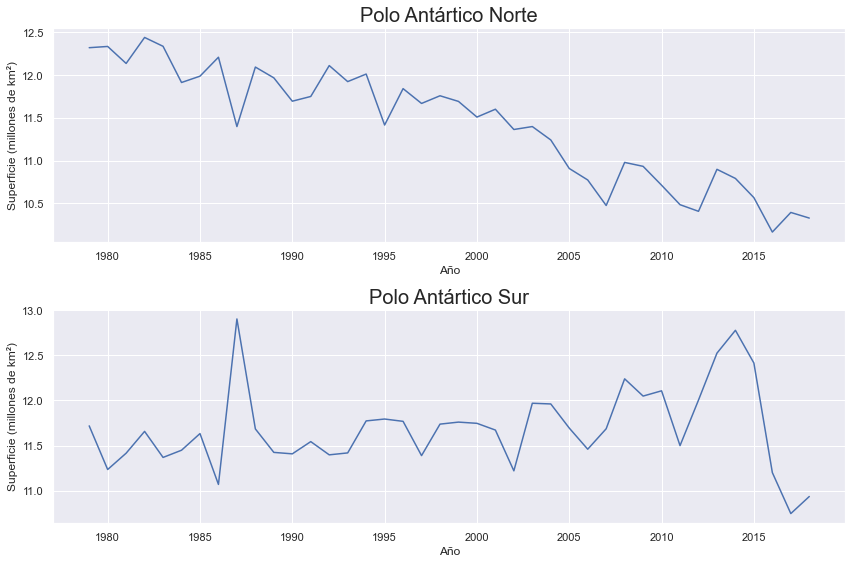

In [101]:
fig, axes = plt.subplots(2,1, figsize=(12,8))

DeshieloData[DeshieloData['hemisphere']=='north'].groupby(DeshieloData['date'].dt.year).mean().plot(y='Superficie', ax=axes[0], legend=False).set_title('Polo Antártico Norte', size=20)
axes[0].set_ylabel("Superficie (millones de km²)")
axes[0].set_xlabel("Año")

DeshieloData[DeshieloData['hemisphere']=='south'].groupby(DeshieloData['date'].dt.year).mean().plot(y='Superficie', ax=axes[1], legend=False).set_title('Polo Antártico Sur', size=20)
axes[1].set_ylabel("Superficie (millones de km²)")
axes[1].set_xlabel("Año")

plt.tight_layout()
plt.savefig('deshielo.jpg')
plt.show()

-2.7740731446635536
Los hielos se redujeron un 11.54 %


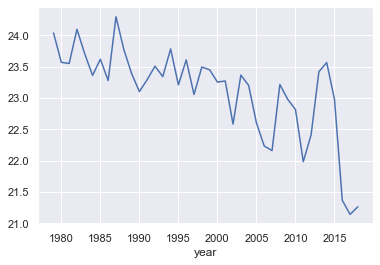

In [97]:
norte = DeshieloData[DeshieloData['hemisphere']=='north'].groupby(DeshieloData['year']).mean()['Superficie']
sur = DeshieloData[DeshieloData['hemisphere']=='south'].groupby(DeshieloData['year']).mean()['Superficie']

anuales = norte + sur
anuales.plot()
previo = anuales.loc[1979]
actual =  anuales.loc[2018]
print(actual - previo)
reduccion = (previo - actual) / previo * 100
print(f"Los hielos se redujeron un %.2f %%" % reduccion)